In [12]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [13]:
mainData = pd.read_csv('Maths.csv')
mainData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
mainData.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [15]:
row = 3
col = 3

mathScore = pd.DataFrame(mainData['math score'])
readingScore = pd.DataFrame(mainData['reading score'])
writingScore = pd.DataFrame(mainData['writing score'])

f, axes = plt.subplots(col, row, figsize=(24, 12))

# Plot the basic uni-variate figures for Math Score
sb.boxplot(data = mathScore, orient = "h", ax = axes[0,0])
sb.histplot(data = mathScore, ax = axes[0,1])
sb.violinplot(data = mathScore, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Reading Score
sb.boxplot(data = readingScore, orient = "h", ax = axes[1,0])
sb.histplot(data = readingScore, ax = axes[1,1])
sb.violinplot(data = readingScore, orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for Writing Score
sb.boxplot(data = writingScore, orient = "h", ax = axes[2,0])
sb.histplot(data = writingScore, ax = axes[2,1])
sb.violinplot(data = writingScore, orient = "h", ax = axes[2,2])

KeyError: 'math score'

In [ ]:
race = pd.DataFrame(mainData['race/ethnicity'])

In [ ]:
jointDF = pd.concat([mathScore, race], axis = 1).reindex(mathScore.index)
jointDF

In [ ]:
sb.jointplot(data = jointDF, x = "race/ethnicity", y = "math score", height = 12)

In [ ]:
finalgrade = pd.DataFrame(mainData['G3'])
finalgrade.shape
#finalgrade.head()

In [ ]:
#freetime vs g3
palette=sb.cubehelix_palette(start=.5, rot=-.5)
sb.set_palette(palette)
fig = plt.figure(figsize=[15,4])
sb.barplot(x='freetime', y='G3', hue='sex', data=mainData)
plt.show()

In [ ]:
#studytime vs g3
palette=sb.cubehelix_palette(start=.5, rot=-.5)
sb.set_palette(palette)
fig = plt.figure(figsize=[15,4])
sb.barplot(x='studytime', y='G3', hue='sex', data=mainData)
plt.show()

In [ ]:
mEdu = pd.DataFrame(mainData['Medu'])
fEdu = pd.DataFrame(mainData['Fedu'])
mJob = pd.DataFrame(mainData['Mjob'])
fJob = pd.DataFrame(mainData['Fjob'])

In [ ]:
parentsFactor = pd.concat([mEdu, fEdu, mJob, fJob, finalgrade], axis = 1).reindex(mEdu.index)

In [ ]:
#comparing parents' education and job to G3
fig = plt.figure(figsize=[22,10])
    
sb.heatmap(parentsFactor.corr(), annot=True, cmap=sb.cubehelix_palette(rot=-.4))

plt.show()

In [ ]:
#failures vs g3
palette=sb.cubehelix_palette(start=.5, rot=-.5)
sb.set_palette(palette)
fig = plt.figure(figsize=[15,4])
sb.barplot(x='absences', y='G3', hue='internet', data=mainData)
plt.show()

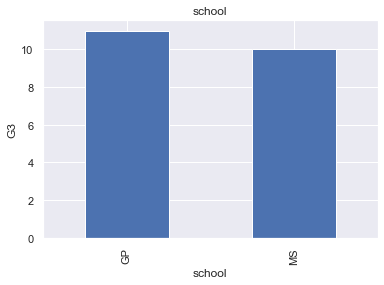

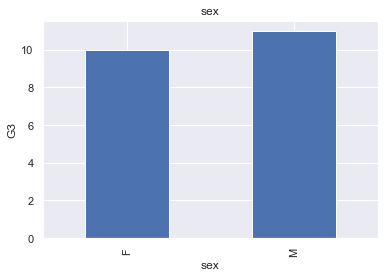

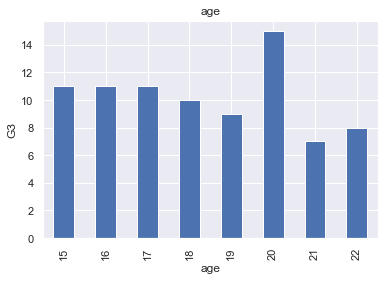

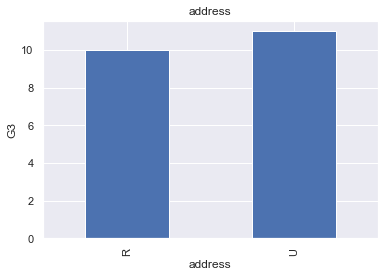

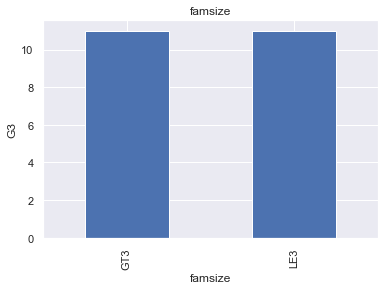

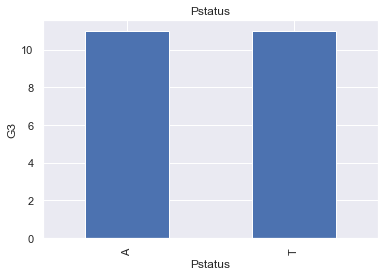

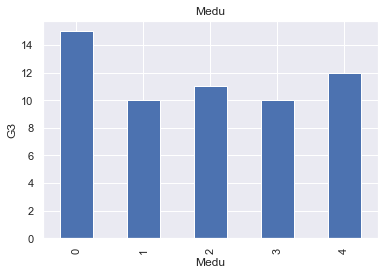

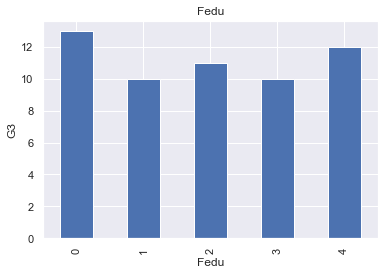

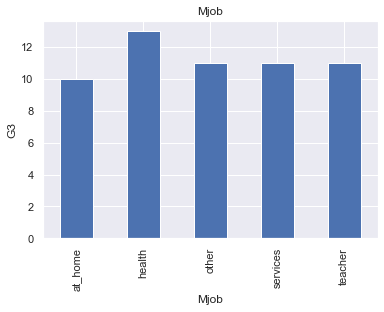

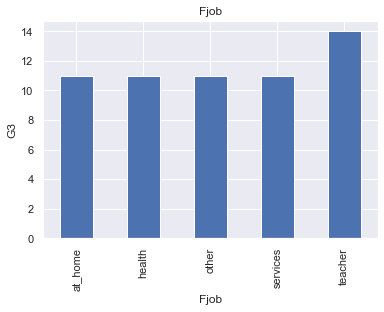

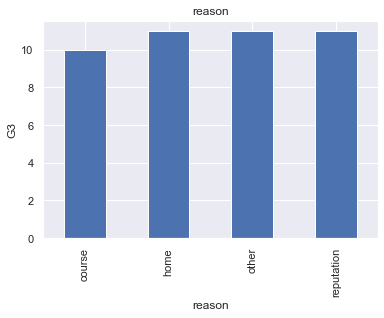

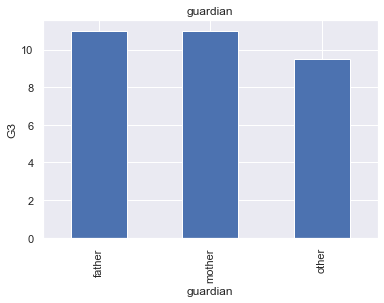

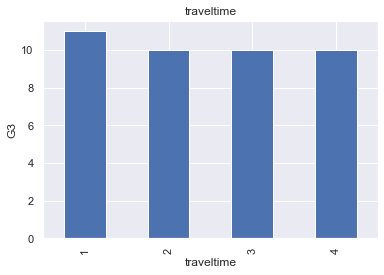

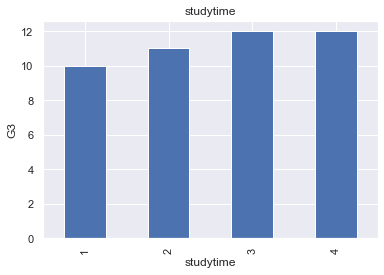

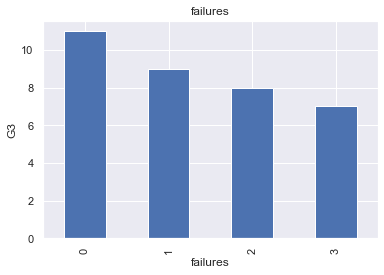

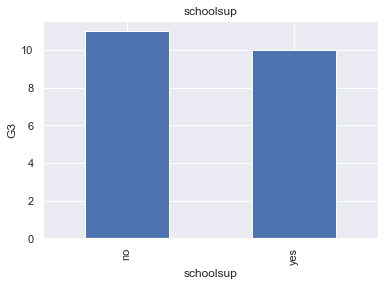

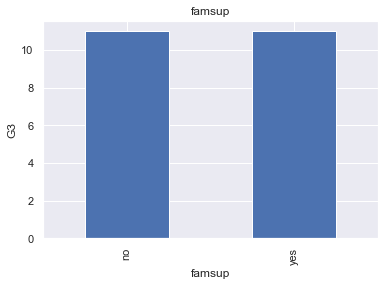

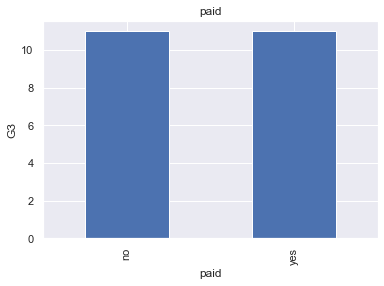

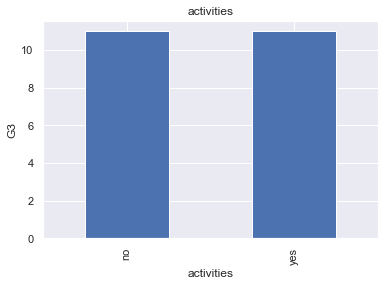

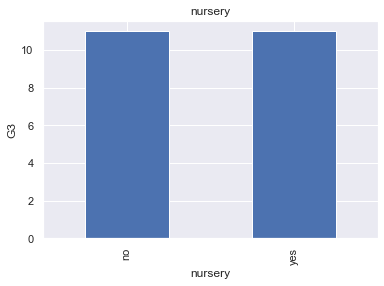

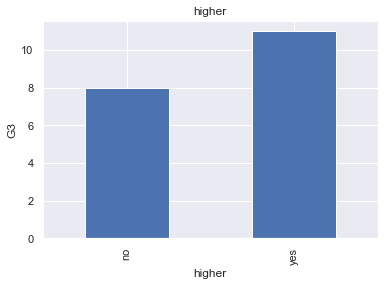

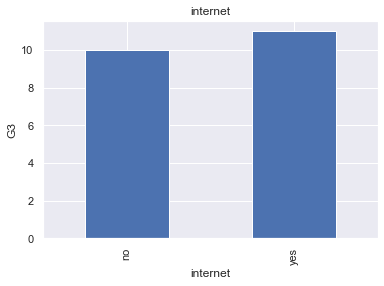

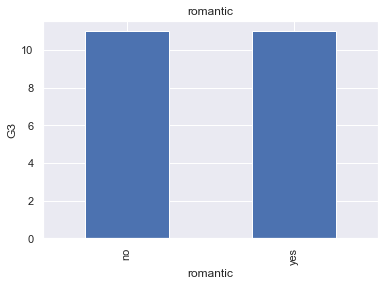

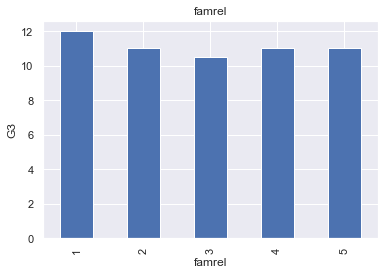

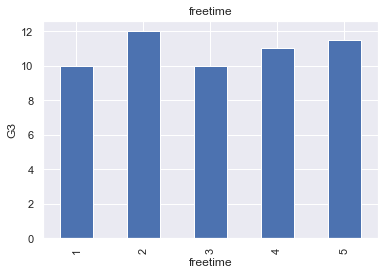

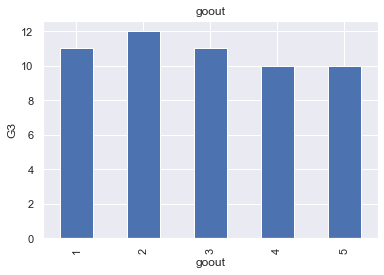

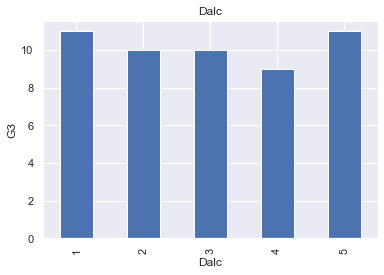

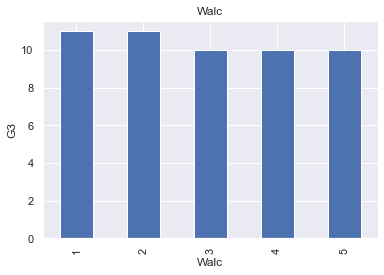

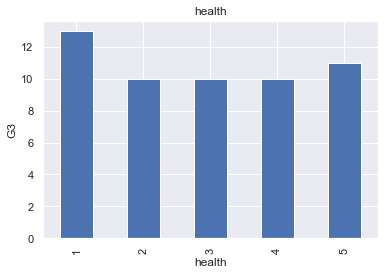

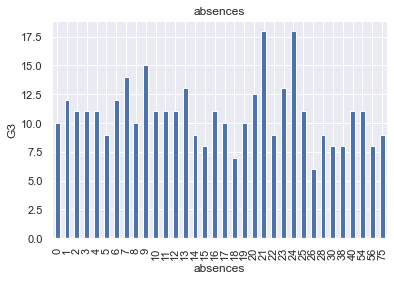

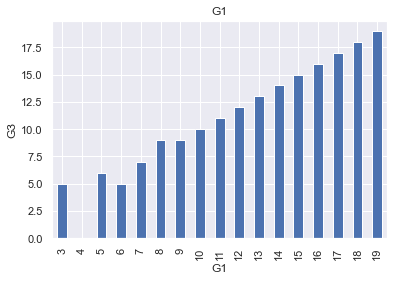

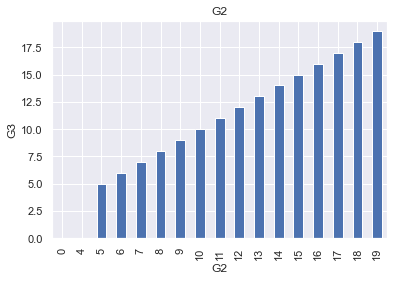

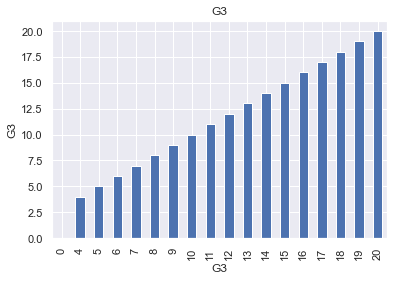

In [16]:
# finding relationship between discrete variables and G3

for features in mainData:
    data = mainData.copy()
    data.groupby(features)['G3'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('G3')
    plt.title(features)
    plt.show()

16


<AxesSubplot:>

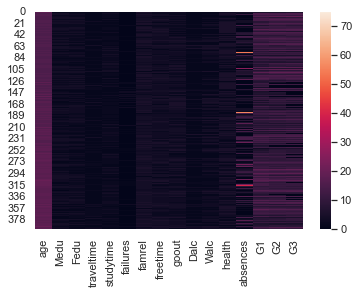

In [18]:
data = mainData.copy()
numerical_features = [
    features for features in data.columns if data[features].dtype != 'O']


print(len(numerical_features))
data[numerical_features].head()
sb.heatmap(data[numerical_features])

In [19]:
# discrete features
discrete_features = [features for features in numerical_features if len(
    data[features].unique()) <= 5]


print(len(discrete_features))
print(discrete_features)
print(data[discrete_features].head())

11
['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
   Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  Dalc  \
0     4     4           2          2         0       4         3      4     1   
1     1     1           1          2         0       5         3      3     1   
2     1     1           1          2         3       4         3      2     2   
3     4     2           1          3         0       3         2      2     1   
4     3     3           1          2         0       4         3      2     1   

   Walc  health  
0     1       3  
1     1       3  
2     3       3  
3     1       5  
4     2       5  


In [20]:
# continous features
continous_features = [
    features for features in numerical_features if features not in discrete_features]

print(len(continous_features))
print(continous_features)
data[continous_features].head()

5
['age', 'absences', 'G1', 'G2', 'G3']


,age,absences,G1,G2,G3
0,18,6,5,6,6
1,17,4,5,5,6
2,15,10,7,8,10
3,15,2,15,14,15
4,16,4,6,10,10


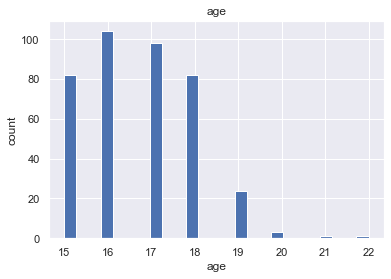

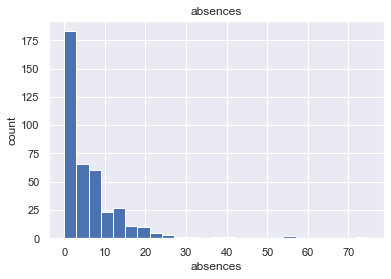

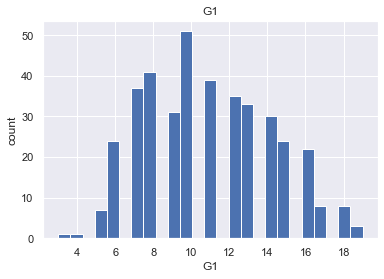

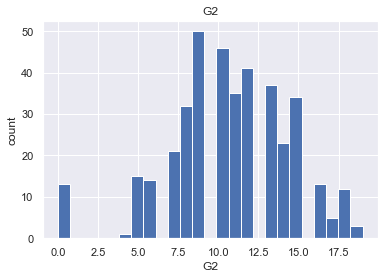

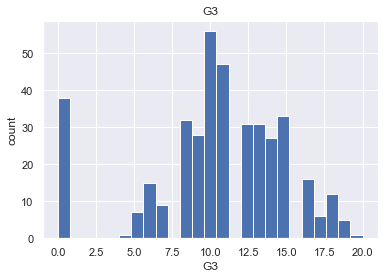

In [21]:
# plotting features to find relaion

for features in continous_features:
    data = mainData.copy()
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("count")
    plt.title(features)
    plt.show()

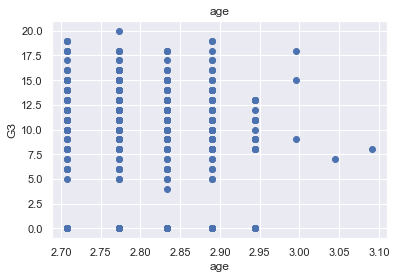

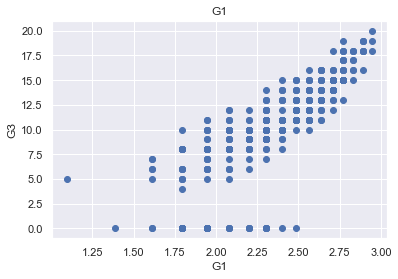

In [22]:
# using lograthmic transformations

for features in continous_features:
    data = mainData.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        plt.scatter(data[features], data['G3'])
        plt.xlabel(features)
        plt.ylabel('G3')
        plt.title(features)
        plt.show()

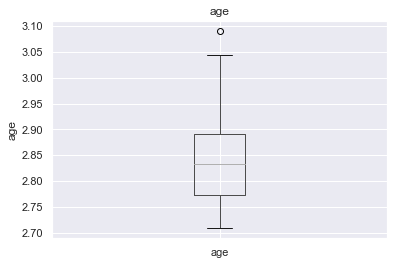

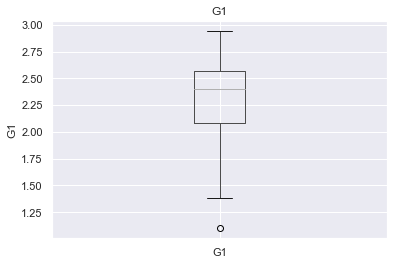

In [23]:
for features in continous_features:  # we use boxplot to find outliers in our data
    data = mainData.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        data.boxplot(column=features)
        plt.ylabel(features)
        plt.title(features)
        plt.show()

In [26]:
categorical_features = [
    features for features in mainData.columns if mainData[features].dtype == 'O']
print(len(categorical_features))
mainData[categorical_features].head()

17


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


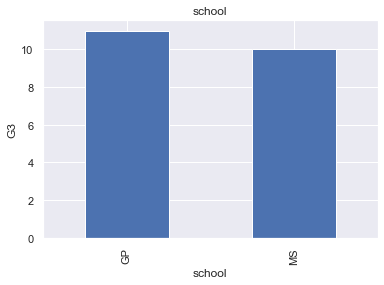

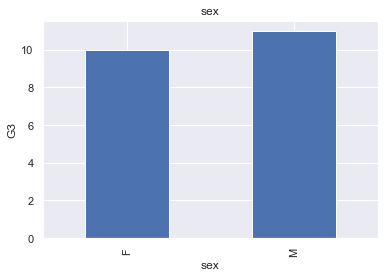

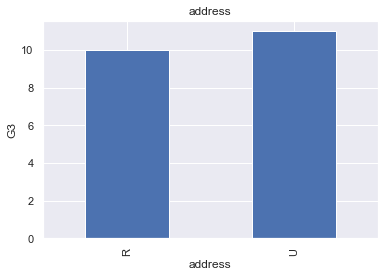

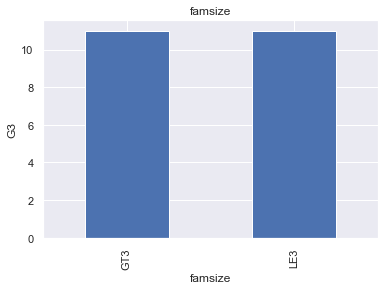

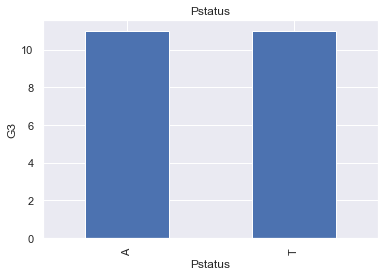

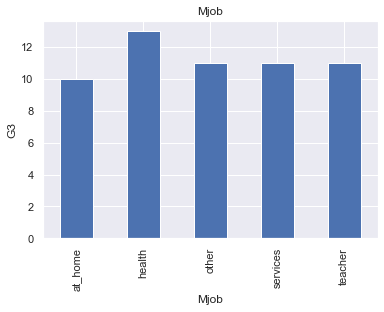

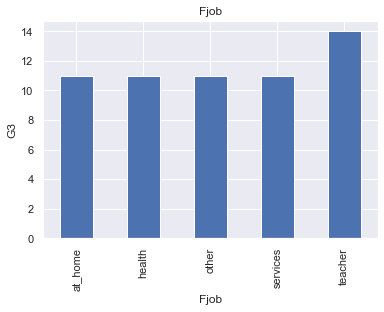

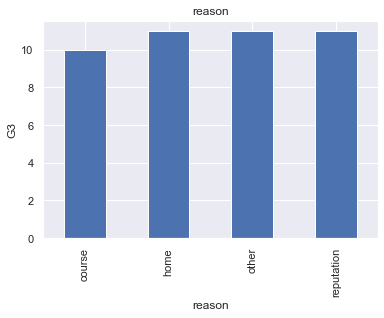

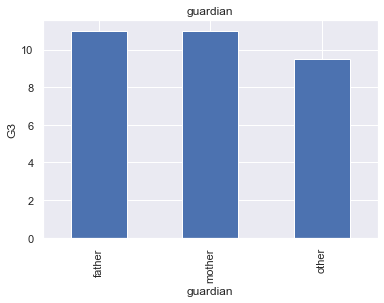

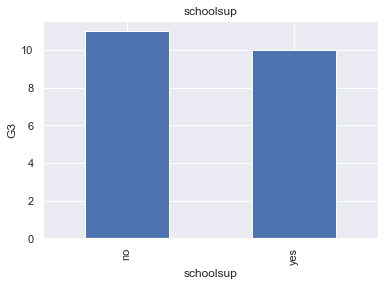

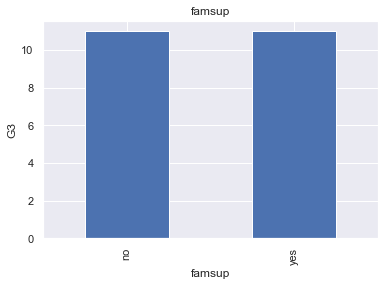

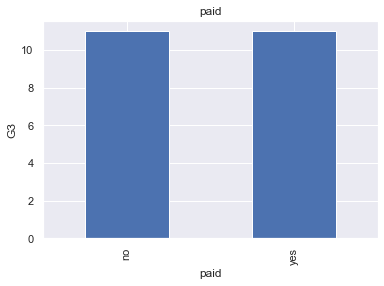

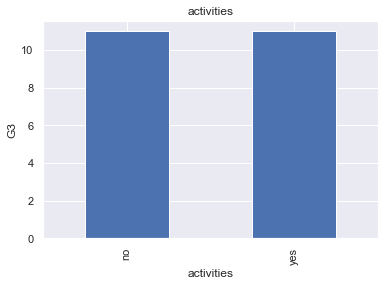

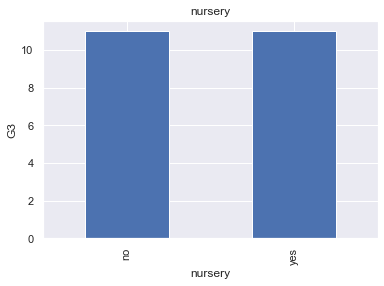

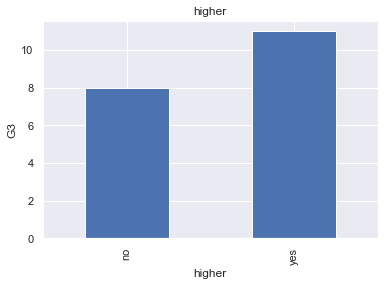

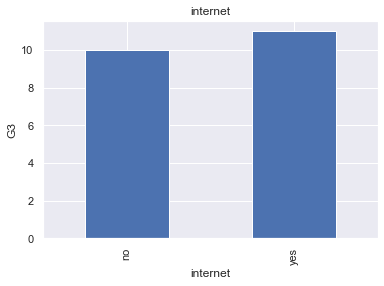

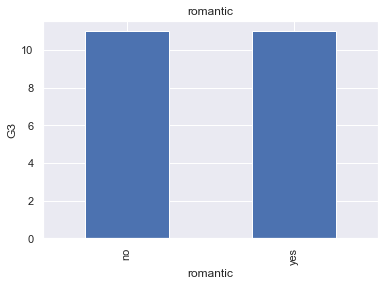

In [27]:
# finding the relationship between categorical variables and dependent variables

for features in categorical_features:
    data = mainData.copy()
    data.groupby(features)['G3'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('G3')
    plt.title(features)
    plt.show()

In [30]:
for feature in categorical_features:
    labels_ordered = mainData.groupby(
        [feature])['G3'].mean().sort_values().index
    labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}
    mainData[feature] = mainData[feature].map(labels_ordered)

mainData[categorical_features].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,1,0,1,0,4,0,1,0,1,0,0,1,1,0,1
1,1,0,1,0,0,0,1,0,2,1,0,0,0,0,1,1,1
2,1,0,1,1,0,0,1,3,1,0,1,1,0,1,1,1,1
3,1,0,1,0,0,4,2,1,1,1,0,1,1,1,1,1,0
4,1,0,1,0,0,1,1,1,2,1,0,1,0,1,1,0,1


In [33]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

feature_scale = [
    features for features in mainData.columns if features not in ['G3']]
print(feature_scale)
scalar.fit_transform(mainData[feature_scale])


mainData = pd.concat([mainData[['G3']].reset_index(drop=True), pd.DataFrame(
    scalar.fit_transform(mainData[feature_scale]), columns=feature_scale)], axis=1)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
